In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Census.csv')
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
data = data.replace('?', np.NaN)
for col in ['workclass', 'occupation', 'native.country']:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [4]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

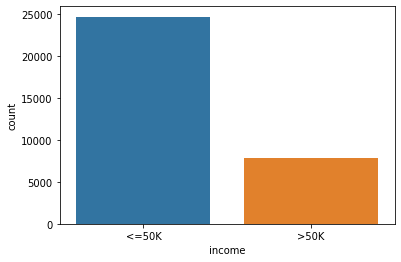

In [7]:
# The dataset seems to be imbalanced
sns.countplot(data['income'])

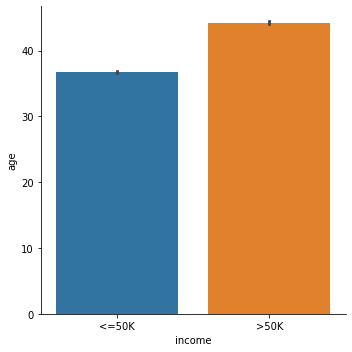

In [8]:
# Analyzing the income distribution based on the age
# Most of the individuals earning more the US$50,000 are more than 40 years of age
sns.catplot(x='income', y='age', kind='bar', data=data)

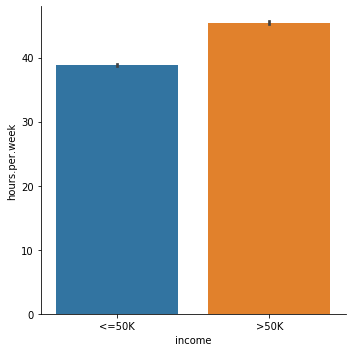

In [9]:
# Analyzing the income based on the hour per week
# Employees working more than 40 hours of per week earned more than US$50,000
sns.catplot(x='income', y='hours.per.week', kind='bar', data=data)
plt.show()

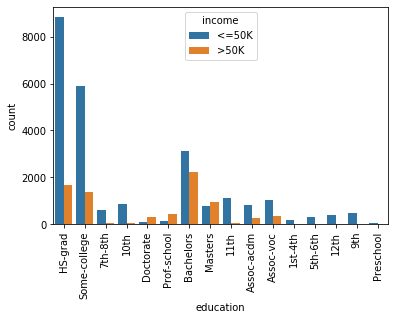

In [10]:
# Analyzing income by type of education
# Most of the individuals earning more than US$50,000 have bachelors degree 
sns.countplot(data['education'],hue=data['income'])
plt.xticks(rotation=90)
plt.show()

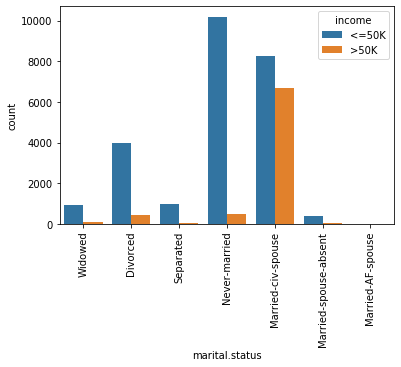

In [11]:
# Analyzing income by type of marital status
# Most of the individuals earning more than US$50,000 are married
sns.countplot(data['marital.status'],hue=data['income'])
plt.xticks(rotation=90)
plt.show()

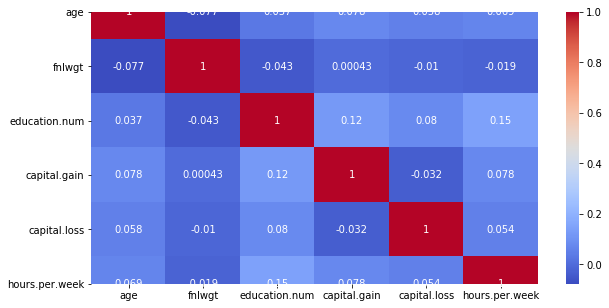

In [12]:
corrmat = data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corrmat, annot=True, cmap='coolwarm')
plt.show()

In [13]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
data.skew()

age                0.558743
fnlwgt             1.446980
education.num     -0.311676
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.227643
dtype: float64

In [15]:
x=data.drop(columns=['income'])
y=data['income']

In [16]:
# Removing skewness from data
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.square(x[index])

In [17]:
x.skew()

age              -0.113341
fnlwgt           -0.671211
education.num    -0.311676
capital.gain      3.096144
capital.loss      4.307537
hours.per.week    0.227643
dtype: float64

In [18]:
# There are categorical variables in the dataset
x=pd.get_dummies(x,drop_first=True)
x

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,4.510860,126.613395,9,0.0,8.379539,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,4.418841,139.172371,9,0.0,8.379539,18,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,4.204693,147.229957,10,0.0,8.379539,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,4.007333,140.469094,4,0.0,8.268988,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,3.737670,155.905599,10,0.0,8.268988,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,3.135494,159.891498,10,0.0,0.000000,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32557,3.332205,155.202005,12,0.0,0.000000,38,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32558,3.713572,142.734154,9,0.0,0.000000,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32559,4.077537,142.349957,9,0.0,0.000000,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 32561, dtype: object

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
a=sc.transform(x)
x=pd.DataFrame(a,columns=x.columns)
x

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,2.549811,-1.175899,-0.420060,-0.299271,5.067180,-0.035429,-0.262097,-0.014664,0.57209,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
1,2.286919,-0.326932,-0.420060,-0.299271,5.067180,-1.817204,-0.262097,-0.014664,0.57209,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
2,1.675113,0.217748,-0.031360,-0.299271,5.067180,-0.035429,-0.262097,-0.014664,0.57209,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
3,1.111270,-0.239276,-2.363558,-0.299271,4.997412,-0.035429,-0.262097,-0.014664,0.57209,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
4,0.340860,0.804208,-0.031360,-0.299271,4.997412,-0.035429,-0.262097,-0.014664,0.57209,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.379515,1.073649,-0.031360,-0.299271,-0.221075,-0.035429,-0.262097,-0.014664,0.57209,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
32557,-0.817527,0.756646,0.746039,-0.299271,-0.221075,-0.197409,-0.262097,-0.014664,0.57209,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
32558,0.272015,-0.086161,-0.420060,-0.299271,-0.221075,-0.035429,-0.262097,-0.014664,0.57209,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173
32559,1.311839,-0.112132,-0.420060,-0.299271,-0.221075,-0.035429,-0.262097,-0.014664,0.57209,-0.188389,...,-0.033729,-0.059274,-0.019201,-0.049628,-0.039607,-0.023518,-0.024163,0.307208,-0.045408,-0.022173


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

array([0, 0, 0, ..., 1, 0, 0])

In [22]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
def maxrocaucscore(cm,x,y):
    max_roc_auc=0
    for r_state in range(0,150):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.20, stratify=y)
        cm.fit(x_train,y_train)
        y_pred=cm.predict(x_test)
        fsc=roc_auc_score(y_test,y_pred)
        if fsc>max_roc_auc:
            max_roc_auc=fsc
            rs=r_state
    print('Maximum roc_auc score is :', max_roc_auc, 'at random state :', rs)

In [24]:
# Using Logistic regression
Logreg=LogisticRegression()
C = [0.001,0.01,0.1,1,10]
penalty=['l1', 'l2']
hyperparametersLogreg=dict(C=C, penalty=penalty)
gridlr=GridSearchCV(Logreg, hyperparametersLogreg, cv=5, scoring='roc_auc', n_jobs=-1)
gridlr.fit(x,y)
print(gridlr.best_params_)

{'C': 0.001, 'penalty': 'l2'}


In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=0.001, penalty='l2')
maxrocaucscore(lr,x,y)

Maximum roc_auc score is : 0.7794516466849631 at random state : 110


In [26]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for LogisticRegression score is:', cross_val_score(lr,x,y,cv=5,scoring="roc_auc").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(lr,x,y,cv=5,scoring="roc_auc").std())

Mean cross validation score for LogisticRegression score is: 0.9035340026635751
Standard deviation in roc_auc score is:  0.020123439325604026


In [27]:
# Using Decision Tree Classifier
dtc=DecisionTreeClassifier()
hyperparametersdtc={'criterion':['gini','entropy'],'max_depth':range(1,10)}
griddtc=GridSearchCV(dtc, hyperparametersdtc, cv=5, scoring='roc_auc')
griddtc.fit(x,y)
print(griddtc.best_params_)

{'criterion': 'entropy', 'max_depth': 4}


In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy', max_depth=4)
maxrocaucscore(dtc,x,y)

Maximum roc_auc score is : 0.7482722575885763 at random state : 107


In [30]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for Decision Tree Classifier is:', cross_val_score(dtc,x,y,cv=5,scoring="roc_auc").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(dtc,x,y,cv=5,scoring="roc_auc").std())

Mean cross validation score for Decision Tree Classifier is: 0.837169696416122
Standard deviation in roc_auc score is:  0.024342921971114942


In [39]:
# Using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
parametersrfc={'n_estimators':[100,150,200,250,300]}
rfc1 = GridSearchCV(rfc, parametersrfc, cv=5,scoring="roc_auc", n_jobs=-1)
rfc1.fit(x,y)
rfc1.best_params_

{'n_estimators': 250}

In [42]:
rfc=RandomForestClassifier(n_estimators=250)
maxrocaucscore(rfc,x,y)

Maximum roc_auc score is : 0.7903558402633046 at random state : 146


In [1]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for Random Forest Classifier is:', cross_val_score(rfc,x,y,cv=5,scoring="roc_auc").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(rfc,x,y,cv=5,scoring="roc_auc").std())

NameError: name 'cross_val_score' is not defined

In [46]:
# Among all the models, RandomForestClassifier is the best performing model
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 146,test_size=0.20,stratify=y)
rfc=RandomForestClassifier(n_estimators=250)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print('classification_report \n', classification_report(y_test,y_pred))
print('Confusion matrix \n', confusion_matrix(y_test,y_pred))
print('AUC ROC Score: ', roc_auc_score(y_test,y_pred))

classification_report 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4945
           1       0.74      0.65      0.69      1568

    accuracy                           0.86      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513

Confusion matrix 
 [[4591  354]
 [ 553 1015]]
AUC ROC Score:  0.7878669832442583


In [47]:
# Saving the decision tree model
from sklearn.externals import joblib 
joblib.dump(rfc, 'Census.pkl')

['Census.pkl']